<a href="https://colab.research.google.com/github/Pluviophile-1/MMO_LAB/blob/main/MMO_lab3_xiu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Загрузка и предварительный просмотр наборов данных

In [21]:
import pandas as pd
import numpy as np

# 加载数据集
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
column_names = [
    'symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
    'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
    'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system',
    'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]

df = pd.read_csv(url, header=None, names=column_names, na_values='?')

# 查看数据集基本信息
print("数据集基本信息：")
print(df.info())
print("\n数据集前5行：")
print(df.head())

数据集基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size      

# 2.Очистка данных

In [22]:
# 处理缺失值
# 对于数值型特征，使用均值填充
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].apply(lambda x: x.fillna(x.mean()), axis=0)

# 对于分类特征，使用众数填充
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# 查看处理后的缺失值情况
print("处理后的缺失值情况：")
print(df.isnull().sum())

处理后的缺失值情况：
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


# 3.Масштабирование характеристик

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# 选择数值型特征进行缩放
numeric_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

# 标准化
scaler_std = StandardScaler()
df_std = pd.DataFrame(scaler_std.fit_transform(df[numeric_features]), columns=numeric_features)
print("标准化后的数据：")
print(df_std.head())

# 归一化
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df[numeric_features]), columns=numeric_features)
print("\n归一化后的数据：")
print(df_minmax.head())

# 鲁邦
scaler_robust = RobustScaler()
df_robust = pd.DataFrame(scaler_robust.fit_transform(df[numeric_features]), columns=numeric_features)
print("鲁邦缩放后的数据：")
print(df_robust.head())

标准化后的数据：
   wheel-base    length     width    height  curb-weight  engine-size  \
0   -1.690772 -0.426521 -0.844782 -2.020417    -0.014566     0.074449   
1   -1.690772 -0.426521 -0.844782 -2.020417    -0.014566     0.074449   
2   -0.708596 -0.231513 -0.190566 -0.543527     0.514882     0.604046   
3    0.173698  0.207256  0.136542  0.235942    -0.420797    -0.431076   
4    0.107110  0.207256  0.230001  0.235942     0.516807     0.218885   

       bore    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  0.519089 -1.839404          -0.288349    0.171065 -0.263484 -0.646553   
1  0.519089 -1.839404          -0.288349    0.171065 -0.263484 -0.646553   
2 -2.404862  0.685920          -0.288349    1.261807 -0.263484 -0.953012   
3 -0.517248  0.462157          -0.035973   -0.057230  0.787346 -0.186865   
4 -0.517248  0.462157          -0.540725    0.272529  0.787346 -1.106241   

   highway-mpg  
0    -0.546059  
1    -0.546059  
2    -0.691627  
3    -0.109354  
4    -1.27

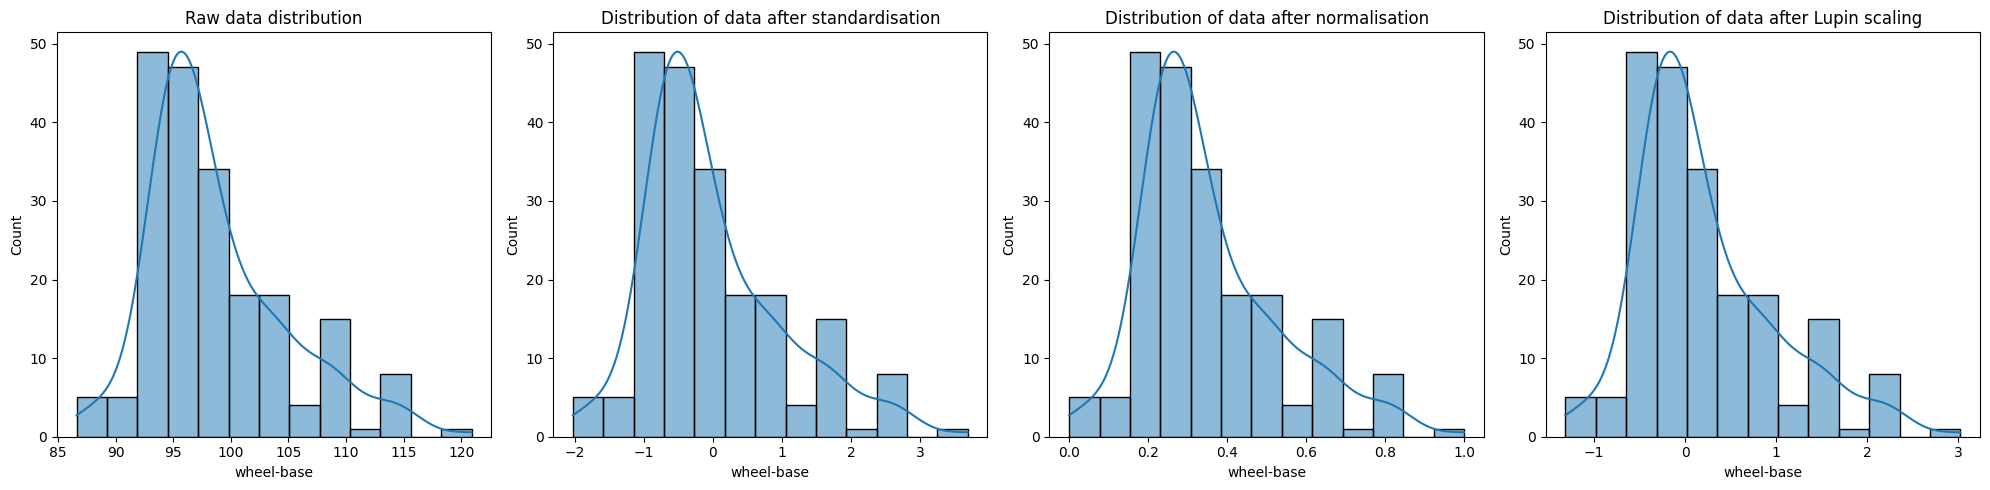

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

feature = 'wheel-base'

# 创建一个图形，包含4个子图
plt.figure(figsize=(20, 5))

# 子图1：原始数据分布
plt.subplot(1, 4, 1)
sns.histplot(df[feature], kde=True)
plt.title('Raw data distribution')

# 子图2：标准化后数据分布
plt.subplot(1, 4, 2)
sns.histplot(df_std[feature], kde=True)
plt.title('Distribution of data after standardisation')

# 子图3：归一化后数据分布
plt.subplot(1, 4, 3)
sns.histplot(df_minmax[feature], kde=True)
plt.title('Distribution of data after normalisation')

# 子图4：鲁邦缩放后数据分布
plt.subplot(1, 4, 4)
sns.histplot(df_robust[feature], kde=True)
plt.title('Distribution of data after Lupin scaling')

# 调整子图之间的间距
plt.tight_layout()
plt.show()

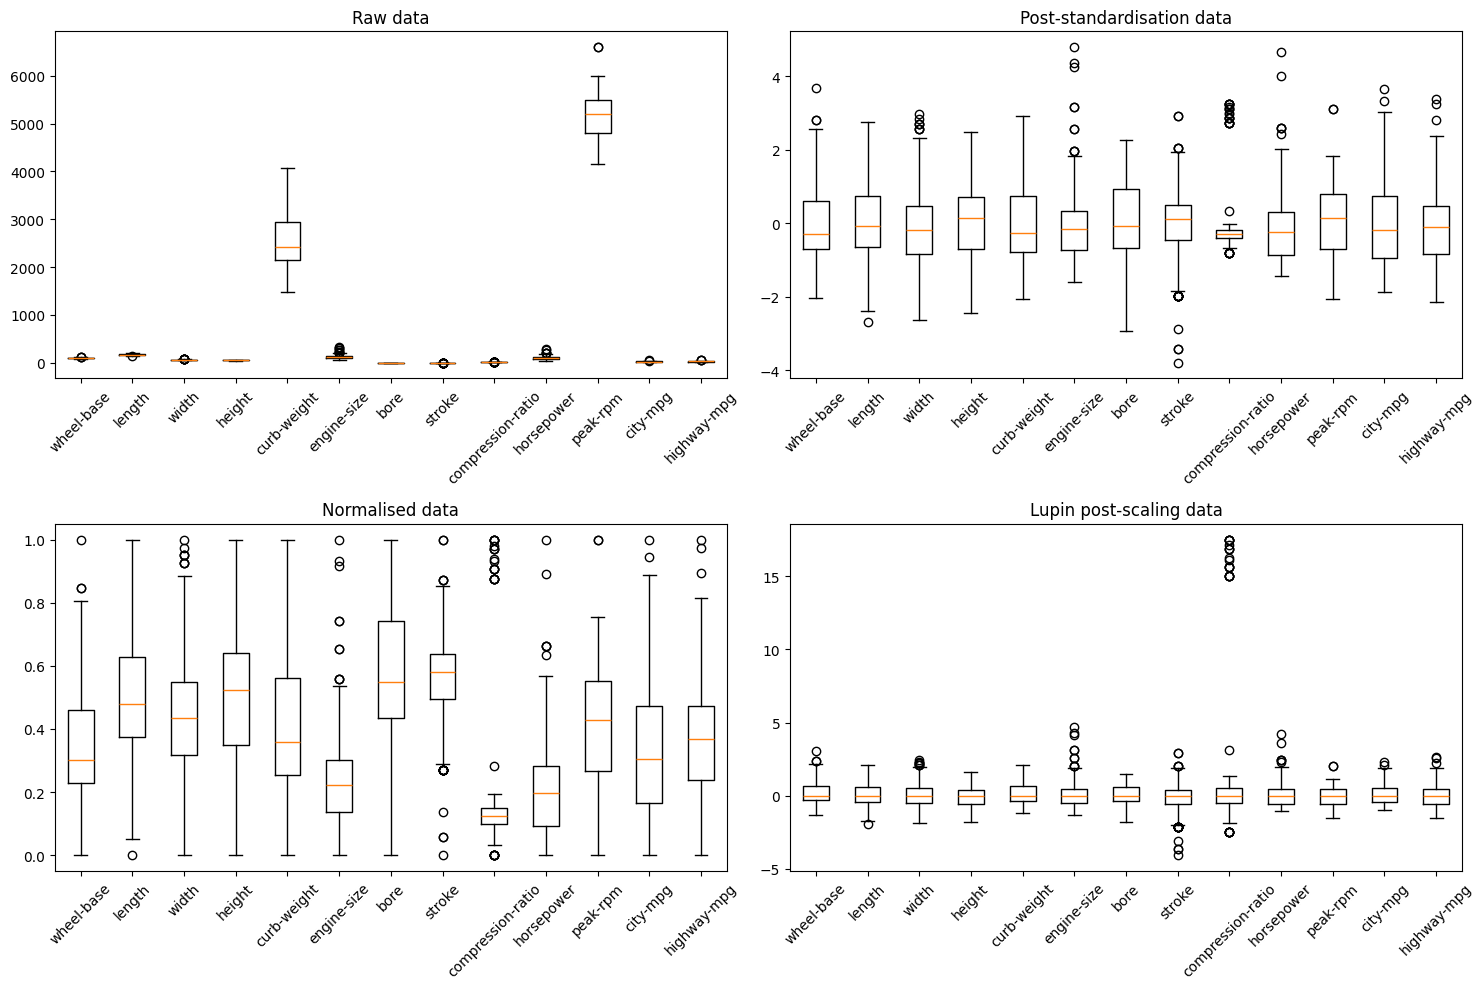

In [30]:

import matplotlib.pyplot as plt

# 可视化特征缩放后的数据
plt.figure(figsize=(15, 10))

# 绘制原始数据的箱线图
plt.subplot(2, 2, 1)
plt.boxplot(df[numeric_features].values)
plt.title('Raw data')
plt.xticks(range(1, len(numeric_features) + 1), numeric_features, rotation=45)

# 绘制标准化后的箱线图
plt.subplot(2, 2, 2)
plt.boxplot(df_std)
plt.title('Post-standardisation data')
plt.xticks(range(1, len(numeric_features) + 1), numeric_features, rotation=45)

# 绘制归一化后的箱线图
plt.subplot(2, 2, 3)
plt.boxplot(df_minmax)
plt.title('Normalised data')
plt.xticks(range(1, len(numeric_features) + 1), numeric_features, rotation=45)

# 绘制鲁邦缩放后的箱线图
plt.subplot(2, 2, 4)
plt.boxplot(df_robust)
plt.title('Lupin post-scaling data')
plt.xticks(range(1, len(numeric_features) + 1), numeric_features, rotation=45)

plt.tight_layout()
plt.show()

# 4.Обработка выбросов в числовых характеристиках

In [ ]:
# 去除异常值（以城市油耗为例）
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

df_no_outliers = remove_outliers_iqr(df, 'city-mpg')
print("去除城市油耗异常值后的数据集大小：", len(df_no_outliers))

# 替代异常值（以发动机尺寸为例子）
def replace_outliers_median(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = data[column].median()
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

df_replaced = df.copy()
df_replaced = replace_outliers_median(df_replaced, 'engine-size')
print("\n替代发动机尺寸异常值后的数据：")
print(df_replaced[['engine-size']].head())

去除城市油耗异常值后的数据集大小： 203

替代发动机尺寸异常值后的数据：
   engine-size
0        130.0
1        130.0
2        152.0
3        109.0
4        136.0


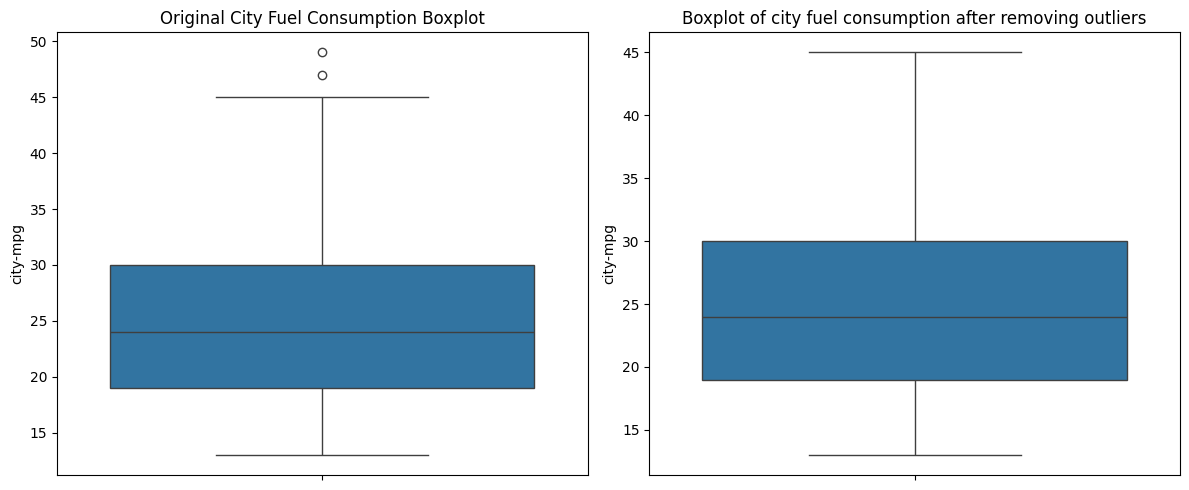

In [ ]:
# 数值特性处理前后数据变化
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(df['city-mpg'])
plt.title('Original City Fuel Consumption Boxplot')

plt.subplot(1, 2, 2)
sns.boxplot(df_no_outliers['city-mpg'])
plt.title('Boxplot of city fuel consumption after removing outliers')

plt.tight_layout()
plt.show()

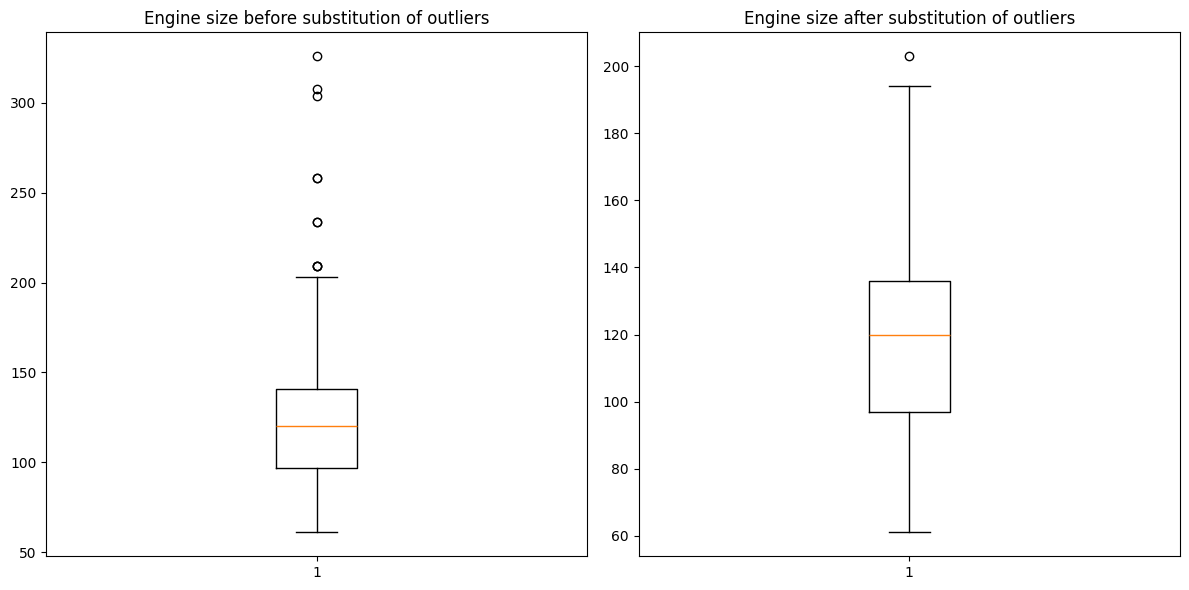

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# 子图 1：替代异常值前的箱线图
plt.subplot(1, 2, 1)
plt.boxplot(df['engine-size'])
plt.title('Engine size before substitution of outliers')

# 子图 2：替代异常值后的箱线图
plt.subplot(1, 2, 2)
plt.boxplot(df_replaced['engine-size'])
plt.title('Engine size after substitution of outliers')

# 调整布局并显示图形
plt.tight_layout()
plt.show()

# 5.Обработка нестандартных функций

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# ----------------------------
# 1. 数据加载与初步清理
# ----------------------------
data = pd.read_csv(
    'AirQualityUCI.csv',
    sep=';',          # 分隔符为分号
    decimal=',',      # 小数点符号为逗号
)
# 合并 Date 和 Time 列（如果未合并）
data['DateTime'] = data['Date'] + ' ' + data['Time']

# 转换为 datetime 类型，指定格式（例如：日/月/年 时.分.秒）
data['DateTime'] = pd.to_datetime(
    data['DateTime'],
    format='%d/%m/%Y %H.%M.%S',  # 根据实际格式调整
    errors='coerce'  # 无法解析的值设为 NaT
)

# 删除冗余的空列（数据集中存在未命名的空列）
data.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True, errors='ignore')

# ----------------------------
# 2. 数据填充：处理缺失值
# ----------------------------
# 原始数据中，-200 表示缺失值，替换为 NaN
print("处理前缺失值统计：")
print(data[['CO(GT)', 'PT08.S1(CO)']].replace(-200, np.nan).isna().sum())  # 打印缺失值数量

# 将 -200 替换为 NaN
data.replace(-200, np.nan, inplace=True)

# 对所有数值列用中位数填充缺失值
numerical_cols = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'T', 'RH']
for col in numerical_cols:
    median_val = data[col].median()
    data[col].fillna(median_val, inplace=True)

print("\n填充后缺失值统计：")
print(data[numerical_cols].isna().sum())  # 确认缺失值已填充

# ----------------------------
# 3. 数据清理：删除无效列与重复行
# ----------------------------
# 删除原始日期和时间列（已合并为 DateTime）
data.drop(['Date', 'Time'], axis=1, inplace=True, errors='ignore')

# 删除完全重复的行
data.drop_duplicates(inplace=True)

# ----------------------------
# 4. 日期特征处理（新增结构化特征）
# ----------------------------
# 提取年、月、日、小时、星期几
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
data['Weekday'] = data['DateTime'].dt.weekday  # 0=周一, 6=周日

# 添加是否为周末
data['Is_Weekend'] = data['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# 时间段分箱（早晨 6-12，下午 12-18，晚上 18-24，深夜 0-6）
bins = [0, 6, 12, 18, 24]
labels = ['Late_Night', 'Morning', 'Afternoon', 'Evening']
data['Time_Segment'] = pd.cut(data['Hour'], bins=bins, labels=labels, right=False)

# 独热编码时间段
time_dummies = pd.get_dummies(data['Time_Segment'], prefix='Time')
data = pd.concat([data, time_dummies], axis=1)
data.drop('Time_Segment', axis=1, inplace=True)  # 删除原始分类列

# ----------------------------
# 5. 数据对比示例
# ----------------------------
pd.set_option('display.max_columns', None)

# 处理前数据（前3行，替换 -200 为 NaN）
print("\n处理前原始数据示例（前3行，所有列）：")
raw_data = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',', nrows=3)
raw_display = raw_data.replace(-200, np.nan)
print(raw_display.to_string(index=False))

# 处理后数据（前3行）
print("\n处理后数据示例（前3行，所有列）：")
print(data.head(3).to_string(index=False))

# 恢复默认显示设置
pd.reset_option('display.max_columns')

处理前缺失值统计：
CO(GT)         1797
PT08.S1(CO)     480
dtype: int64

填充后缺失值统计：
CO(GT)         0
PT08.S1(CO)    0
NMHC(GT)       0
C6H6(GT)       0
T              0
RH             0
dtype: int64

处理前原始数据示例（前3行，所有列）：
      Date     Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)    T   RH     AH  Unnamed: 15  Unnamed: 16
10/03/2004 18.00.00     2.6         1360       150      11.9           1046      166          1056      113          1692         1268 13.6 48.9 0.7578          NaN          NaN
10/03/2004 19.00.00     2.0         1292       112       9.4            955      103          1174       92          1559          972 13.3 47.7 0.7255          NaN          NaN
10/03/2004 20.00.00     2.2         1402        88       9.0            939      131          1140      114          1555         1074 11.9 54.0 0.7502          NaN          NaN

处理后数据示例（前3行，所有列）：
 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NO

<ipython-input-8-43ffa30e8a22>:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_val, inplace=True)


# 6.Выбор характеристик

In [31]:
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split

# 筛选方法：方差阈值法
selector = VarianceThreshold(threshold=0.5)
selected_features = selector.fit_transform(df[numeric_features])
selected_columns = df[numeric_features].columns[selector.get_support()]
print("方差阈值法选择的特征：", list(selected_columns))

# 包装方法：递归特征消除（RFE）
# 这里以逻辑回归为例，假设我们要预测价格是否高于中位数
df['price_label'] = (df['price'] > df['price'].median()).astype(int)
X = df[numeric_features]
y = df['price_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features_rfe = X_train.columns[rfe.support_]
print("\nRFE选择的特征：", list(selected_features_rfe))

# 嵌入方法：Lasso回归
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
selected_features_lasso = X_train.columns[np.abs(lasso.coef_) > 0]
print("\nLasso选择的特征：", list(selected_features_lasso))


方差阈值法选择的特征： ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


RFE选择的特征： ['width', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg']

Lasso选择的特征： ['length', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg']


In [ ]:

# 特征选择结果比较
selected_methods = {
    '方差阈值法': list(selected_columns),
    'RFE': list(selected_features_rfe),
    'Lasso': list(selected_features_lasso)
}

for method, features in selected_methods.items():
    print(f"{method}选择的特征：{features}")

方差阈值法选择的特征：['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
RFE选择的特征：['width', 'stroke', 'compression-ratio', 'city-mpg', 'highway-mpg']
Lasso选择的特征：['length', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'highway-mpg']
